<center>

<img src="Details.png" alt="Details" width="40%" height="40%" style="border-radius: 10px;">

### Hypothesis Estimation

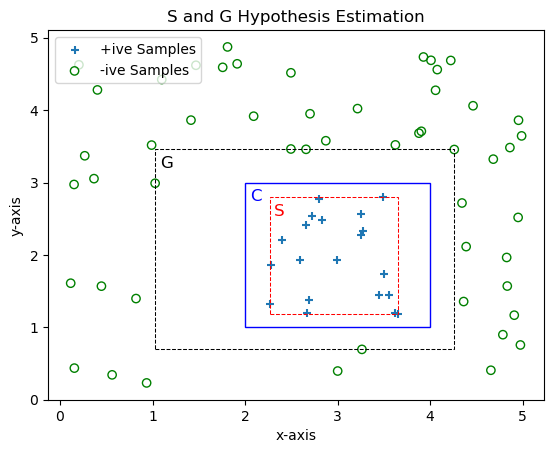

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Small tau value for adding spacing
tau = 0.15

# Generate positive samples
positive_samples = np.random.uniform(
    low=(2 + tau, 1 + tau), high=(4 - tau, 3 - tau), size=(20, 2)
)

# Generate negative samples
negative_samples = np.random.uniform(low=[0, 0], high=[5, 5], size=(80, 2))

# Remove negative samples that are inside the positive region
negative_samples = negative_samples[
    ~(
        (negative_samples[:, 0] > 2 - tau * 2)
        & (negative_samples[:, 0] < 4 + tau * 2)
        & (negative_samples[:, 1] > 1 - tau * 2)
        & (negative_samples[:, 1] < 3 + tau * 2)
    )
]

# Find strict class boundary region from positive samples
strict_min_x = np.min(positive_samples[:, 0])
strict_max_x = np.max(positive_samples[:, 0])
strict_min_y = np.min(positive_samples[:, 1])
strict_max_y = np.max(positive_samples[:, 1])

# Find most general class boundary region from negative samples
# General class boundary is the extension of strict class boundary lines of each of the 4 sides until it hits a negative sample
general_min_x = []
general_max_x = []
general_min_y = []
general_max_y = []

# Find the maximum y value of negative samples that are above the top side of the strict class boundary
for sample in negative_samples:
    if (
        sample[0] > strict_min_x
        and sample[0] < strict_max_x
        and sample[1] > strict_max_y
    ):
        general_max_y.append(sample[1])

# Find the minimum y value of negative samples that are below the bottom side of the strict class boundary
for sample in negative_samples:
    if (
        sample[0] > strict_min_x
        and sample[0] < strict_max_x
        and sample[1] < strict_min_y
    ):
        general_min_y.append(sample[1])

# If there are negative samples above the top side of the strict class boundary, set the general_max_y to the minimum of those samples
if not general_max_y == []:
    general_max_y = np.min(general_max_y)
else:
    general_max_y = strict_max_y

# If there are negative samples below the bottom side of the strict class boundary, set the general_min_y to the maximum of those samples
if not general_min_y == []:
    general_min_y = np.max(general_min_y)
else:
    general_min_y = strict_min_y

# Find the maximum x value of negative samples that are to the right of the right side of the strict class boundary
for sample in negative_samples:
    if (
        sample[1] > general_min_y
        and sample[1] < general_max_y
        and sample[0] > strict_max_x
    ):
        general_max_x.append(sample[0])

# Find the minimum x value of negative samples that are to the left of the left side of the strict class boundary
for sample in negative_samples:
    if (
        sample[1] > general_min_y
        and sample[1] < general_max_y
        and sample[0] < strict_min_x
    ):
        general_min_x.append(sample[0])

# If there are negative samples to the right of the right side of the strict class boundary, set the general_max_x to the minimum of those samples
if not general_max_x == []:
    general_max_x = np.min(general_max_x)
else:
    general_max_x = strict_max_x

# If there are negative samples to the left of the left side of the strict class boundary, set the general_min_x to the maximum of those samples
if not general_min_x == []:
    general_min_x = np.max(general_min_x)
else:
    general_min_x = strict_min_x

# Plot positive and negative samples
fig, ax = plt.subplots()
ax.scatter(
    positive_samples[:, 0], positive_samples[:, 1], label="+ive Samples", marker="+"
)
ax.scatter(
    negative_samples[:, 0],
    negative_samples[:, 1],
    label="-ive Samples",
    facecolors="none",
    edgecolors="g",
)

# Plot the strict class boundary region
S = [strict_min_x, strict_min_y, strict_max_x, strict_max_y]
ax.add_patch(
    Rectangle(
        (strict_min_x, strict_min_y),
        strict_max_x - strict_min_x,
        strict_max_y - strict_min_y,
        fill=False,
        lw=0.75,
        linestyle="--",
        edgecolor="r",
    )
)
ax.text(strict_min_x + 0.05, strict_max_y - 0.25, "S", fontsize=12, color="r")

# Plot the general class boundary region
G = [general_min_x, general_min_y, general_max_x, general_max_y]
ax.add_patch(
    Rectangle(
        (general_min_x, general_min_y),
        general_max_x - general_min_x,
        general_max_y - general_min_y,
        fill=False,
        lw=0.75,
        linestyle="--",
        edgecolor="black",
    )
)
ax.text(general_min_x + 0.05, general_max_y - 0.25, "G", fontsize=12, color="black")

# Plot the class boundary
ax.add_patch(Rectangle((2, 1), 2, 2, fill=False, edgecolor="b", lw=1))
ax.text(2.05, 2.75, "C", fontsize=12, color="b")

ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.legend(loc="upper left")
ax.set_title("S and G Hypothesis Estimation")
plt.show()

### Mapping Test Data to the Hypothesis

Percentage of positive points falling in S:  0.8
Percentage of negative points falling in S:  0.0
Percentage of positive points falling in G:  1.0
Percentage of negative points falling in G:  0.12


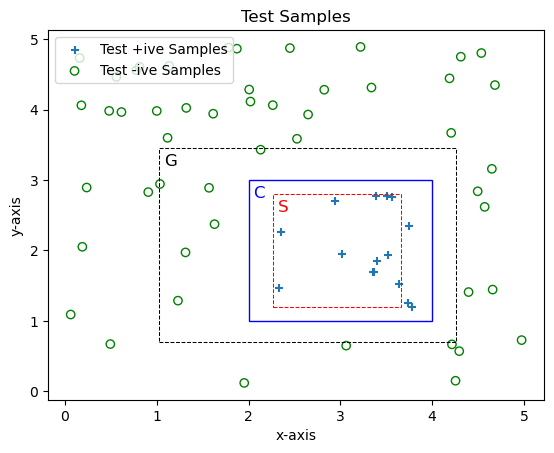

In [3]:
# Small tau value for adding spacing
tau = 0.15

# Generate positive samples
test_positive_samples = np.random.uniform(
    low=(2 + tau, 1 + tau), high=(4 - tau, 3 - tau), size=(15, 2)
)

# Generate negative samples
test_negative_samples = np.random.uniform(low=[0, 0], high=[5, 5], size=(60, 2))

# Remove negative samples that are inside the positive region
test_negative_samples = test_negative_samples[
    ~(
        (test_negative_samples[:, 0] > 2 - tau * 2)
        & (test_negative_samples[:, 0] < 4 + tau * 2)
        & (test_negative_samples[:, 1] > 1 - tau * 2)
        & (test_negative_samples[:, 1] < 3 + tau * 2)
    )
]

# 1) Percentage of positive points falling in S
# 2) Percentage of negative points falling in S
# 3) Percentage of positive points falling in G
# 4) Percentage of negative points falling in G

positive_points_in_S = 0
negative_points_in_S = 0
positive_points_in_G = 0
negative_points_in_G = 0

for sample in test_positive_samples:
    if (
        sample[0] >= strict_min_x
        and sample[0] <= strict_max_x
        and sample[1] >= strict_min_y
        and sample[1] <= strict_max_y
    ):
        positive_points_in_S += 1
    if (
        sample[0] >= general_min_x
        and sample[0] <= general_max_x
        and sample[1] >= general_min_y
        and sample[1] <= general_max_y
    ):
        positive_points_in_G += 1

for sample in test_negative_samples:
    if (
        sample[0] >= strict_min_x
        and sample[0] <= strict_max_x
        and sample[1] >= strict_min_y
        and sample[1] <= strict_max_y
    ):
        negative_points_in_S += 1
    if (
        sample[0] >= general_min_x
        and sample[0] <= general_max_x
        and sample[1] >= general_min_y
        and sample[1] <= general_max_y
    ):
        negative_points_in_G += 1

print(
    "Percentage of positive points falling in S: ",
    positive_points_in_S / len(test_positive_samples),
)
print(
    "Percentage of negative points falling in S: ",
    negative_points_in_S / len(test_negative_samples),
)
print(
    "Percentage of positive points falling in G: ",
    positive_points_in_G / len(test_positive_samples),
)
print(
    "Percentage of negative points falling in G: ",
    negative_points_in_G / len(test_negative_samples),
)

# Plot scatter plot of test samples
fig, ax = plt.subplots()
ax.scatter(
    test_positive_samples[:, 0],
    test_positive_samples[:, 1],
    label="Test +ive Samples",
    marker="+",
)
ax.scatter(
    test_negative_samples[:, 0],
    test_negative_samples[:, 1],
    label="Test -ive Samples",
    facecolors="none",
    edgecolors="g",
)

# Plot the strict class boundary region
ax.add_patch(
    Rectangle(
        (strict_min_x, strict_min_y),
        strict_max_x - strict_min_x,
        strict_max_y - strict_min_y,
        fill=False,
        lw=0.75,
        linestyle="--",
        edgecolor="r",
    )
)
ax.text(strict_min_x + 0.05, strict_max_y - 0.25, "S", fontsize=12, color="r")

# Plot the general class boundary region
ax.add_patch(
    Rectangle(
        (general_min_x, general_min_y),
        general_max_x - general_min_x,
        general_max_y - general_min_y,
        fill=False,
        lw=0.75,
        linestyle="--",
        edgecolor="black",
    )
)
ax.text(general_min_x + 0.05, general_max_y - 0.25, "G", fontsize=12, color="black")

# Plot the class boundary
ax.add_patch(Rectangle((2, 1), 2, 2, fill=False, edgecolor="b", lw=1))
ax.text(2.05, 2.75, "C", fontsize=12, color="b")

ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.legend(loc="upper left")
ax.set_title("Test Samples")
plt.show()